#**Advanced Machine Learning**

### **Assignment 1: Building Neural Networks**

For the IMDB example that we discussed in class, do the following:

1.You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

3.Try using the 'mse' loss function instead of 'binary_crossentropy'.

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

.5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.



# **_Importing required Packages_**



In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


import matplotlib.pyplot as plt



from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dropout

# **_Importing the IMDB dataset_**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data (
    num_words= 10000)

Note that "num_words=10000" is added in the code. It means that only the top 10,000 most common words will be used to have a more manageable size vector data.

The train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). The train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive."

In [ ]:
max([max(sequence) for sequence in train_data])

#**_Decoding Reviews back to text_**

In this section, we will develop a code to see a specific review

In [ ]:
# The word_index assigns a unique index to each word present in the text.
word_index = imdb.get_word_index()
# We create a reverse dictionary, mapping integer indices to words.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])

#**_Preparing the Data_**

_We have to change our reviews from characters into tensors. For this we will one-hot-encode our lists to turn them into vectors of 0s and 1s._ 

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

_Now let's vectorize the labels_

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Splitting the data into training and validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# **_Building the Neural Network_**



## **Model 1: 2 layers, 16 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy** 

In [ ]:
from keras import models
from keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating the Approach**

Setting aside a Validation set of 10,000 in order to validate and measure how our training set is performing, which originally was 25,000.

Now our model will be trained for 25 epochs (25 iterations over all the samples in x_train and y_train tensors) , in the batches of 512 samples. At this step we will monitor the accuracy and loss of the 10,000 samples which we set aside. 

In [ ]:
# Model training
history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 3s 76ms/step - loss: 0.5137 - accuracy: 0.7763 - val_loss: 0.3869 - val_accuracy: 0.8631
Epoch 2/25
30/30 [==============================] - 1s 38ms/step - loss: 0.3144 - accuracy: 0.8959 - val_loss: 0.3214 - val_accuracy: 0.8757
Epoch 3/25
30/30 [==============================] - 1s 39ms/step - loss: 0.2399 - accuracy: 0.9174 - val_loss: 0.2836 - val_accuracy: 0.8877
Epoch 4/25
30/30 [==============================] - 2s 51ms/step - loss: 0.1919 - accuracy: 0.9354 - val_loss: 0.2741 - val_accuracy: 0.8893
Epoch 5/25
30/30 [==============================] - 2s 52ms/step - loss: 0.1641 - accuracy: 0.9451 - val_loss: 0.2770 - val_accuracy: 0.8872
Epoch 6/25
30/30 [==============================] - 1s 43ms/step - loss: 0.1379 - accuracy: 0.9541 - val_loss: 0.3036 - val_accuracy: 0.8808
Epoch 7/25
30/30 [==============================] - 1s 42ms/step - loss: 0.1176 - accuracy: 0.9629 - val_loss: 0.3068 - val_accuracy: 0.8848
Epoch 8/25
30

In [ ]:
#Summary of the model
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Now, let's see the History object, which is a dictionary containing data about everything that happened during training.** 

In [ ]:
history_dict_1 = history_1.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**We will now plot the Training and Validation loss, as well as the training and validation accuracy.**

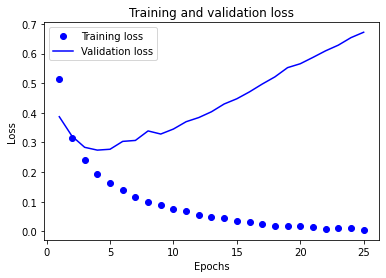

In [ ]:
# Training and Validation loss
import matplotlib.pyplot as plt
history1_dict= history_1.history
twoly_loss_values = history1_dict["loss"]
twoly_val_loss_values = history1_dict["val_loss"]
epochs_1 = range(1, len(twoly_loss_values) + 1)
plt.plot(epochs_1, twoly_loss_values, "bo", label="Training loss")
plt.plot(epochs_1, twoly_val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

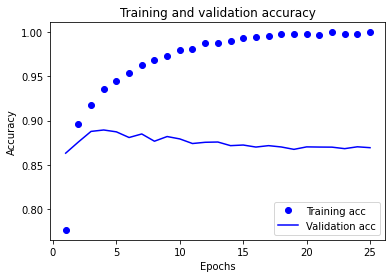

In [ ]:
# Training and Validation Accuracy
plt.clf()
twoly_acc = history1_dict["accuracy"]
twoly_val_acc = history1_dict["val_accuracy"]
epochs_1 = range(1, len(twoly_acc) + 1)
plt.plot(epochs_1, twoly_acc, "bo", label="Training acc")
plt.plot(epochs_1, twoly_val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The results show that the best accuracy on the validation set appears around 4 epochs.** 

###**_Back Propagation- Retraining the model using 4 epochs_**

In [ ]:
model_t1 = models.Sequential()
model_t1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_t1.add(layers.Dense(16, activation='relu'))
model_t1.add(layers.Dense(1, activation='sigmoid'))

model_t1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_t1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_t1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 37ms/step - loss: 0.4604 - accuracy: 0.8092
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2668 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2085 - accuracy: 0.9241
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2893 - accuracy: 0.8848


In [ ]:
results

[0.289347380399704, 0.8848400115966797]

**_The accuracy of the model on the test set is 88.48%_**

## **Model 2: 1 layers, 32 Neurons, Activation- relu, Optimizer- adam, Loss- binary_crossentropy** 

In [ ]:
from keras import models
from keras import layers

model_2 = models.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 5s 145ms/step - loss: 0.4957 - accuracy: 0.7918 - val_loss: 0.3577 - val_accuracy: 0.8666
Epoch 2/30
30/30 [==============================] - 2s 55ms/step - loss: 0.2721 - accuracy: 0.9092 - val_loss: 0.3016 - val_accuracy: 0.8797
Epoch 3/30
30/30 [==============================] - 1s 49ms/step - loss: 0.2042 - accuracy: 0.9337 - val_loss: 0.2789 - val_accuracy: 0.8908
Epoch 4/30
30/30 [==============================] - 1s 42ms/step - loss: 0.1602 - accuracy: 0.9520 - val_loss: 0.2787 - val_accuracy: 0.8877
Epoch 5/30
30/30 [==============================] - 2s 66ms/step - loss: 0.1341 - accuracy: 0.9625 - val_loss: 0.2838 - val_accuracy: 0.8856
Epoch 6/30
30/30 [==============================] - 2s 59ms/step - loss: 0.1113 - accuracy: 0.9721 - val_loss: 0.2927 - val_accuracy: 0.8833
Epoch 7/30
30/30 [==============================] - 1s 47ms/step - loss: 0.0932 - accuracy: 0.9793 - val_loss: 0.3030 - val_accuracy: 0.8810
Epoch 8/30
3

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320032    
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

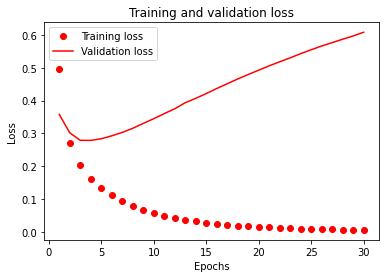

In [ ]:
import matplotlib.pyplot as plt
history2_dict = history_2.history
onelay_loss = history2_dict['loss']
onelay_val_loss = history2_dict['val_loss']

onelay_epochs = range(1, len(onelay_loss) + 1)


plt.plot(onelay_epochs, onelay_loss, 'ro', label='Training loss')
plt.plot(onelay_epochs, onelay_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

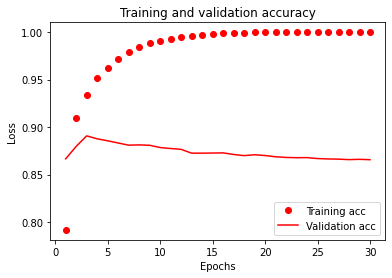

In [ ]:
plt.clf()   # clear figure
onelay_acc_values = history2_dict['accuracy']
onelay_val_acc_values = history2_dict['val_accuracy']

plt.plot(onelay_epochs, onelay_acc_values, 'ro', label='Training acc')
plt.plot(onelay_epochs, onelay_val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 4 epochs.** 

###**_Back Propagation- Retraining the model using 4 epochs_**

In [ ]:
model_t2 = models.Sequential()
model_t2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_t2.add(layers.Dense(1, activation='sigmoid'))

model_t2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_t2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_t2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.4411 - accuracy: 0.8280
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2410 - accuracy: 0.9155
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1873 - accuracy: 0.9360
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2953 - accuracy: 0.8838


In [ ]:
results

[0.2953276038169861, 0.883840024471283]

**_The accuracy of the model on the test set is 88.38%_**

## **Model 3: 3 layers, 32 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy, Dropout- 0.5** 

In [ ]:
from keras.layers import Dropout


model_3 = models.Sequential()
model_3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dropout(rate= 0.5))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dropout(rate=0.5))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dropout(rate=0.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(optimizer= 'rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=520,
                    validation_data=(x_val, y_val))

Epoch 1/40
29/29 [==============================] - 3s 70ms/step - loss: 0.6556 - accuracy: 0.6020 - val_loss: 0.5209 - val_accuracy: 0.8392
Epoch 2/40
29/29 [==============================] - 1s 46ms/step - loss: 0.5002 - accuracy: 0.7820 - val_loss: 0.3623 - val_accuracy: 0.8651
Epoch 3/40
29/29 [==============================] - 1s 43ms/step - loss: 0.3744 - accuracy: 0.8587 - val_loss: 0.2968 - val_accuracy: 0.8820
Epoch 4/40
29/29 [==============================] - 2s 65ms/step - loss: 0.3005 - accuracy: 0.8910 - val_loss: 0.2825 - val_accuracy: 0.8868
Epoch 5/40
29/29 [==============================] - 2s 66ms/step - loss: 0.2529 - accuracy: 0.9138 - val_loss: 0.2798 - val_accuracy: 0.8881
Epoch 6/40
29/29 [==============================] - 1s 45ms/step - loss: 0.2095 - accuracy: 0.9296 - val_loss: 0.3028 - val_accuracy: 0.8879
Epoch 7/40
29/29 [==============================] - 1s 45ms/step - loss: 0.1769 - accuracy: 0.9432 - val_loss: 0.3202 - val_accuracy: 0.8832
Epoch 8/40
29

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                320032    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
history_dict_3 = history_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

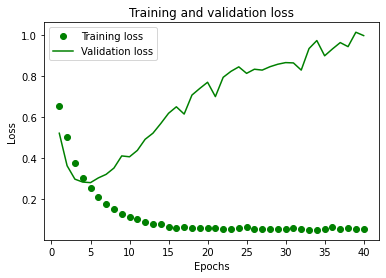

In [ ]:
import matplotlib.pyplot as plt
history3_dict = history_3.history
threelay_loss = history3_dict['loss']
threelay_val_loss = history3_dict['val_loss']

threelay_epochs = range(1, len(threelay_loss) + 1)


plt.plot(threelay_epochs, threelay_loss, 'go', label='Training loss')
plt.plot(threelay_epochs, threelay_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


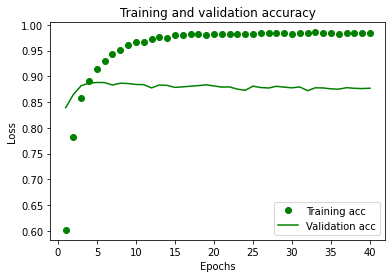

In [ ]:
plt.clf()   # clear figure
threelay_acc_values = history3_dict['accuracy']
threelay_val_acc_values = history3_dict['val_accuracy']

plt.plot(threelay_epochs, threelay_acc_values, 'go', label='Training acc')
plt.plot(threelay_epochs, threelay_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 5 epochs.**

###**_Back Propagation- Retraining the model using 5 epochs_**

In [ ]:
model_t3 = models.Sequential()
model_t3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_t3.add(layers.Dropout(rate= 0.5))
model_t3.add(layers.Dense(32, activation='relu'))
model_t3.add(layers.Dropout(rate= 0.5))
model_t3.add(layers.Dense(32, activation='relu'))
model_t3.add(layers.Dropout(rate= 0.5))
model_t3.add(layers.Dense(1, activation='sigmoid'))

model_t3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_t3.fit(x_train, y_train, epochs=5, batch_size=520)
results = model_t3.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 4s 48ms/step - loss: 0.6138 - accuracy: 0.6583
Epoch 2/5
49/49 [==============================] - 2s 34ms/step - loss: 0.4302 - accuracy: 0.8295
Epoch 3/5
49/49 [==============================] - 2s 33ms/step - loss: 0.3255 - accuracy: 0.8832
Epoch 4/5
49/49 [==============================] - 2s 34ms/step - loss: 0.2658 - accuracy: 0.9075
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3196 - accuracy: 0.8842


**_The accuracy of the model on the test set is 88.42%_**

## **Model 4: 1 layers, 64 Neurons, Activation- tanh, Optimizer- rmsprop, Loss- binary_crossentropy** 

In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/40
30/30 [==============================] - 8s 202ms/step - loss: 0.4789 - accuracy: 0.7923 - val_loss: 0.3947 - val_accuracy: 0.8387
Epoch 2/40
30/30 [==============================] - 4s 127ms/step - loss: 0.2973 - accuracy: 0.8937 - val_loss: 0.2986 - val_accuracy: 0.8862
Epoch 3/40
30/30 [==============================] - 4s 123ms/step - loss: 0.2355 - accuracy: 0.9137 - val_loss: 0.2954 - val_accuracy: 0.8782
Epoch 4/40
30/30 [==============================] - 3s 89ms/step - loss: 0.1961 - accuracy: 0.9309 - val_loss: 0.2786 - val_accuracy: 0.8854
Epoch 5/40
30/30 [==============================] - 2s 81ms/step - loss: 0.1706 - accuracy: 0.9390 - val_loss: 0.2777 - val_accuracy: 0.8864
Epoch 6/40
30/30 [==============================] - 2s 59ms/step - loss: 0.1454 - accuracy: 0.9482 - val_loss: 0.2890 - val_accuracy: 0.8850
Epoch 7/40
30/30 [==============================] - 2s 56ms/step - loss: 0.1307 - accuracy: 0.9550 - val_loss: 0.3080 - val_accuracy: 0.8839
Epoch 8/40

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_4 = history_4.history
history_dict_4.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

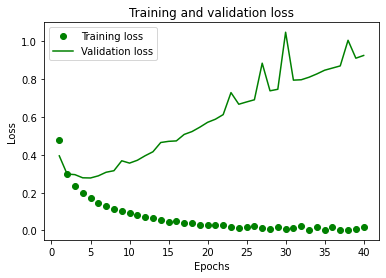

In [ ]:
import matplotlib.pyplot as plt
history4_dict = history_4.history
onelay64_loss = history4_dict['loss']
onelay64_val_loss = history4_dict['val_loss']

onelay64_epochs = range(1, len(onelay64_loss) + 1)


plt.plot(onelay64_epochs, onelay64_loss, 'go', label='Training loss')
plt.plot(onelay64_epochs, onelay64_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


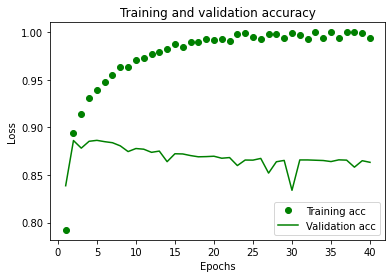

In [ ]:
plt.clf()   # clear figure
onelay64_acc_values = history4_dict['accuracy']
onelay64_val_acc_values = history4_dict['val_accuracy']

onelay64_epochs = range(1, len(onelay64_acc_values) + 1)

plt.plot(onelay64_epochs, onelay64_acc_values, 'go', label='Training acc')
plt.plot(onelay64_epochs, onelay64_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 5 epochs.**

###**_Back Propagation- Retraining the model using 5 epochs._**

In [ ]:
model_t4 = models.Sequential()
model_t4.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model_t4.add(layers.Dense(1, activation='sigmoid'))

model_t4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_test = model_t4.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 5s 81ms/step - loss: 0.4268 - accuracy: 0.8200
Epoch 2/5
49/49 [==============================] - 3s 53ms/step - loss: 0.2605 - accuracy: 0.9016
Epoch 3/5
49/49 [==============================] - 2s 44ms/step - loss: 0.2094 - accuracy: 0.9198
Epoch 4/5
49/49 [==============================] - 2s 44ms/step - loss: 0.1878 - accuracy: 0.9288
Epoch 5/5
49/49 [==============================] - 2s 43ms/step - loss: 0.1738 - accuracy: 0.9338


In [ ]:
results = model_t4.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3026 - accuracy: 0.8798


**_The accuracy of the model on the test set is 87.98%_**

## **Model 5: 2 layers, 64 Neurons, Activation- relu, Optimizer- adam, Loss- mse** 

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_5.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 3s 81ms/step - loss: 0.1576 - accuracy: 0.7924 - val_loss: 0.0911 - val_accuracy: 0.8794
Epoch 2/25
30/30 [==============================] - 2s 66ms/step - loss: 0.0600 - accuracy: 0.9253 - val_loss: 0.0831 - val_accuracy: 0.8872
Epoch 3/25
30/30 [==============================] - 4s 120ms/step - loss: 0.0367 - accuracy: 0.9591 - val_loss: 0.0860 - val_accuracy: 0.8832
Epoch 4/25
30/30 [==============================] - 2s 59ms/step - loss: 0.0233 - accuracy: 0.9785 - val_loss: 0.0910 - val_accuracy: 0.8795
Epoch 5/25
30/30 [==============================] - 2s 67ms/step - loss: 0.0159 - accuracy: 0.9867 - val_loss: 0.0971 - val_accuracy: 0.8735
Epoch 6/25
30/30 [==============================] - 2s 58ms/step - loss: 0.0112 - accuracy: 0.9913 - val_loss: 0.1002 - val_accuracy: 0.8730
Epoch 7/25
30/30 [==============================] - 2s 58ms/step - loss: 0.0085 - accuracy: 0.9933 - val_loss: 0.1008 - val_accuracy: 0.8722
Epoch 8/25
3

In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_5 = history_5.history
history_dict_5.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

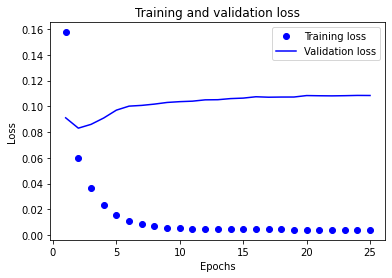

In [ ]:
import matplotlib.pyplot as plt


twoly64_loss = history_5.history['loss']
twoly64_val_loss = history_5.history['val_loss']

twoly64_epochs = range(1, len(twoly64_loss) + 1)

# "bo" is for "blue dot"
plt.plot(twoly64_epochs, twoly64_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(twoly64_epochs, twoly64_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

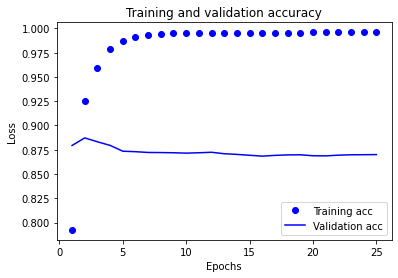

In [ ]:
plt.clf()   # clear figure
twoly64_acc_values = history_5.history['accuracy']
twoly64_val_acc_values = history_5.history['val_accuracy']

twoly64_epochs = range(1, len(twoly64_acc_values) + 1)

plt.plot(twoly64_epochs, twoly64_acc_values, 'bo', label='Training acc')
plt.plot(twoly64_epochs, twoly64_val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 2 epochs.**

###**_Back Propagation- Retraining the model using 2 epochs._**

In [ ]:
model_t5 = models.Sequential()
model_t5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_t5.add(layers.Dense(64, activation='relu'))
model_t5.add(layers.Dense(1, activation='sigmoid'))

model_t5.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history_test = model_t5.fit(x_train, y_train, epochs=2, batch_size=512)
results = model_t5.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 3s 46ms/step - loss: 0.1245 - accuracy: 0.8374
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.8770


**_The accuracy of the model on the test set is 87.70%_**

## **Model 6: 2 layers, 16 Neurons, Activation- tanh, Optimizer- rmsprop, Loss- mse**



In [ ]:
model_6 = models.Sequential()
model_6.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_6.add(layers.Dense(16, activation='tanh'))
model_6.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_6.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 2s 58ms/step - loss: 0.1619 - accuracy: 0.7937 - val_loss: 0.1188 - val_accuracy: 0.8583
Epoch 2/25
30/30 [==============================] - 2s 53ms/step - loss: 0.0914 - accuracy: 0.8946 - val_loss: 0.0934 - val_accuracy: 0.8795
Epoch 3/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0678 - accuracy: 0.9189 - val_loss: 0.0955 - val_accuracy: 0.8689
Epoch 4/25
30/30 [==============================] - 1s 35ms/step - loss: 0.0545 - accuracy: 0.9346 - val_loss: 0.0899 - val_accuracy: 0.8765
Epoch 5/25
30/30 [==============================] - 1s 37ms/step - loss: 0.0444 - accuracy: 0.9485 - val_loss: 0.1059 - val_accuracy: 0.8558
Epoch 6/25
30/30 [==============================] - 1s 32ms/step - loss: 0.0385 - accuracy: 0.9551 - val_loss: 0.0977 - val_accuracy: 0.8682
Epoch 7/25
30/30 [==============================] - 1s 33ms/step - loss: 0.0313 - accuracy: 0.9655 - val_loss: 0.0939 - val_accuracy: 0.8780
Epoch 8/25
30

In [ ]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                160016    
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_6 = history_6.history
history_dict_6.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

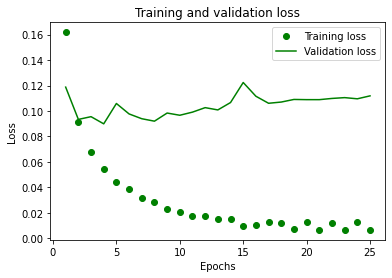

In [ ]:
import matplotlib.pyplot as plt

history6_dict = history_6.history
twolymse_loss = history6_dict['loss']
twolymse_val_loss = history6_dict['val_loss']

twolymse_epochs = range(1, len(twolymse_loss) + 1)

# "go" is for "green dot"
plt.plot(twolymse_epochs, twolymse_loss, 'go', label='Training loss')
# g is for "solid green line"
plt.plot(twolymse_epochs, twolymse_val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

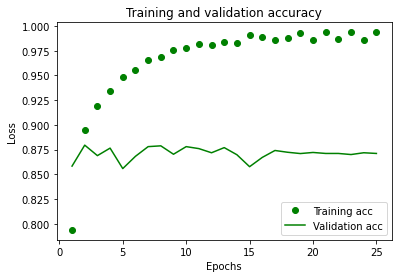

In [ ]:
plt.clf()   # clear figure
twolymse_acc_values = history6_dict['accuracy']
twolymse_val_acc_values = history6_dict['val_accuracy']

twolymse_epochs = range(1, len(twolymse_acc_values) + 1)

plt.plot(twolymse_epochs, twolymse_acc_values, 'go', label='Training acc')
plt.plot(twolymse_epochs, twolymse_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

**The results show that the best accuracy on the validation set appears around 4 epochs.**

###**_Back Propagation- Retraining the model using 4 epochs._**

In [ ]:
model_t6 = models.Sequential()
model_t6.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_t6.add(layers.Dense(16, activation='tanh'))
model_t6.add(layers.Dense(1, activation='sigmoid'))

model_t6.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_test = model_t6.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_t6.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.1429 - accuracy: 0.8195
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0799 - accuracy: 0.8997
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0609 - accuracy: 0.9223
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0873 - accuracy: 0.8826


In [ ]:
results

[0.08726087212562561, 0.8826000094413757]

**_The accuracy of the model on the test set is 88.26%_**

## **Model 7: 3 layers, 64 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy, Regularizers- L2 (0.001)**

In [ ]:
from keras import regularizers
model_7 = models.Sequential()
model_7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_7.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_7.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_7 = model_7.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 3s 85ms/step - loss: 0.7602 - accuracy: 0.7295 - val_loss: 0.6344 - val_accuracy: 0.8121
Epoch 2/25
30/30 [==============================] - 2s 60ms/step - loss: 0.4947 - accuracy: 0.8824 - val_loss: 0.4660 - val_accuracy: 0.8845
Epoch 3/25
30/30 [==============================] - 3s 118ms/step - loss: 0.4116 - accuracy: 0.9067 - val_loss: 0.4922 - val_accuracy: 0.8634
Epoch 4/25
30/30 [==============================] - 2s 58ms/step - loss: 0.3498 - accuracy: 0.9249 - val_loss: 0.5183 - val_accuracy: 0.8543
Epoch 5/25
30/30 [==============================] - 2s 67ms/step - loss: 0.3180 - accuracy: 0.9317 - val_loss: 0.4331 - val_accuracy: 0.8849
Epoch 6/25
30/30 [==============================] - 2s 60ms/step - loss: 0.2884 - accuracy: 0.9422 - val_loss: 0.4208 - val_accuracy: 0.8810
Epoch 7/25
30/30 [==============================] - 2s 67ms/step - loss: 0.2557 - accuracy: 0.9525 - val_loss: 0.4317 - val_accuracy: 0.8829
Epoch 8/25
3

In [ ]:
model_7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 648,449
Trainable params: 648,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_7 = history_7.history
history_dict_7.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

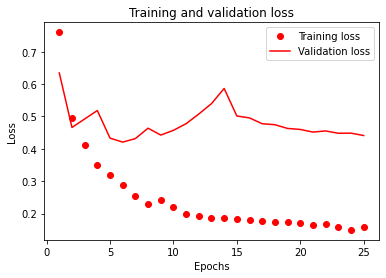

In [ ]:
import matplotlib.pyplot as plt

threely64_loss = history_7.history['loss']
threely64_val_loss = history_7.history['val_loss']

threely64_epochs = range(1, len(threely64_loss) + 1)

# "go" is for "green dot"
plt.plot(threely64_epochs, threely64_loss, 'ro', label='Training loss')
# g is for "solid green line"
plt.plot(threely64_epochs, threely64_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

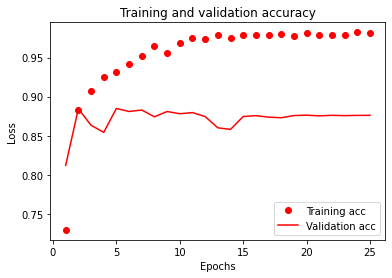

In [ ]:
plt.clf()   # clear figure
threely64_acc_values = history_7.history['accuracy']
threely64_val_acc_values = history_7.history['val_accuracy']

threely64_epochs = range(1, len(threely64_acc_values) + 1)
plt.plot(threely64_epochs, threely64_acc_values, 'ro', label='Training acc')
plt.plot(threely64_epochs, threely64_val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

**The results show that the best accuracy on the validation set appears around 2 epochs.**

###**_Back Propagation- Retraining the model using 2 epochs._**

In [ ]:
model_t7 = models.Sequential()
model_t7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_t7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),  activation='relu'))
model_t7.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),  activation='relu'))
model_t7.add(layers.Dense(1, activation='sigmoid'))

model_t7.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_test = model_t7.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_t7.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 5s 77ms/step - loss: 0.6745 - accuracy: 0.7852
Epoch 2/5
49/49 [==============================] - 3s 68ms/step - loss: 0.4426 - accuracy: 0.8914
Epoch 3/5
49/49 [==============================] - 2s 48ms/step - loss: 0.3635 - accuracy: 0.9135
Epoch 4/5
49/49 [==============================] - 2s 47ms/step - loss: 0.3196 - accuracy: 0.9250
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.4345 - accuracy: 0.8758


In [ ]:
results

[0.4345399737358093, 0.8758000135421753]

**_The accuracy of the model on the test set is 87.58%._**

## **Model 8: 2 layers, 16 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy, Regularizers- L2 (0.001)** 

In [ ]:
from keras import regularizers

model_8 = models.Sequential()
model_8.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu', input_shape=(10000,)))
model_8.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu'))
model_8.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_8.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_8 = model_8.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 4s 103ms/step - loss: 0.5725 - accuracy: 0.7799 - val_loss: 0.4582 - val_accuracy: 0.8499
Epoch 2/25
30/30 [==============================] - 1s 45ms/step - loss: 0.3742 - accuracy: 0.8942 - val_loss: 0.3862 - val_accuracy: 0.8686
Epoch 3/25
30/30 [==============================] - 1s 38ms/step - loss: 0.2987 - accuracy: 0.9171 - val_loss: 0.3400 - val_accuracy: 0.8861
Epoch 4/25
30/30 [==============================] - 1s 34ms/step - loss: 0.2606 - accuracy: 0.9269 - val_loss: 0.3414 - val_accuracy: 0.8822
Epoch 5/25
30/30 [==============================] - 1s 36ms/step - loss: 0.2338 - accuracy: 0.9395 - val_loss: 0.3524 - val_accuracy: 0.8799
Epoch 6/25
30/30 [==============================] - 1s 36ms/step - loss: 0.2158 - accuracy: 0.9463 - val_loss: 0.3590 - val_accuracy: 0.8797
Epoch 7/25
30/30 [==============================] - 1s 36ms/step - loss: 0.2026 - accuracy: 0.9515 - val_loss: 0.3529 - val_accuracy: 0.8815
Epoch 8/25
3

In [ ]:
model_8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                160016    
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_8 = history_8.history
history_dict_8.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

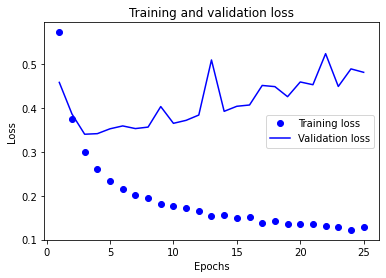

In [ ]:
import matplotlib.pyplot as plt

twolyreg_loss = history_8.history['loss']
twolyreg_val_loss = history_8.history['val_loss']

twolyreg_epochs =range(1, len(twolyreg_loss) + 1)

# "bo" is for "blue dot"
plt.plot(twolyreg_epochs, twolyreg_loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(twolyreg_epochs, twolyreg_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

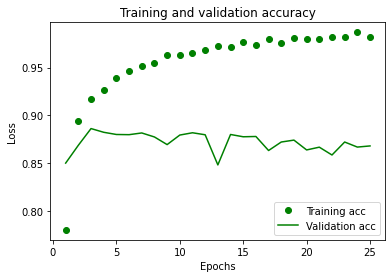

In [ ]:
plt.clf()   # clear figure
twolyreg_acc_values = history_8.history['accuracy']
twolyreg_val_acc_values = history_8.history['val_accuracy']


twolyreg_epochs = range(1, len(twolyreg_acc_values) + 1)
plt.plot(twolyreg_epochs, twolyreg_acc_values, 'go', label='Training acc')
plt.plot(twolyreg_epochs, twolyreg_val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 3 epochs.**

###**_Back Propagation- Retraining the model using 3 epochs._**

In [ ]:
from keras import regularizers

model_t8 = models.Sequential()
model_t8.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu', input_shape=(10000,)))
model_t8.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                           activation='relu'))
model_t8.add(layers.Dense(1, activation='sigmoid'))

model_t8.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

model_t8.fit(x_train, y_train,
                             epochs=3,
                             batch_size=512)

results = model_t8.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 28ms/step - loss: 0.5249 - acc: 0.8047
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.3287 - acc: 0.8986
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3373 - acc: 0.8844


[0.3372530937194824, 0.8844000101089478]

**_The accuracy of the model on the test set is 88.44%_** 

## **Model 9: 2 layers, 16 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy, Dropout- 0.5** 

In [ ]:
model_9 = models.Sequential()
model_9.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_9.add(layers.Dropout(rate= 0.5))
model_9.add(layers.Dense(16, activation='relu'))
model_9.add(layers.Dropout(rate=0.5))
model_9.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_9.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_9 = model_9.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 4s 94ms/step - loss: 0.6357 - accuracy: 0.6124 - val_loss: 0.5465 - val_accuracy: 0.8421
Epoch 2/25
30/30 [==============================] - 1s 48ms/step - loss: 0.5394 - accuracy: 0.7321 - val_loss: 0.4525 - val_accuracy: 0.8678
Epoch 3/25
30/30 [==============================] - 1s 44ms/step - loss: 0.4707 - accuracy: 0.7951 - val_loss: 0.3775 - val_accuracy: 0.8739
Epoch 4/25
30/30 [==============================] - 1s 44ms/step - loss: 0.4085 - accuracy: 0.8307 - val_loss: 0.3288 - val_accuracy: 0.8856
Epoch 5/25
30/30 [==============================] - 1s 42ms/step - loss: 0.3511 - accuracy: 0.8663 - val_loss: 0.2956 - val_accuracy: 0.8889
Epoch 6/25
30/30 [==============================] - 1s 38ms/step - loss: 0.3140 - accuracy: 0.8841 - val_loss: 0.2816 - val_accuracy: 0.8904
Epoch 7/25
30/30 [==============================] - 1s 36ms/step - loss: 0.2797 - accuracy: 0.9052 - val_loss: 0.2774 - val_accuracy: 0.8882
Epoch 8/25
30

In [ ]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_9 = history_9.history
history_dict_9.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

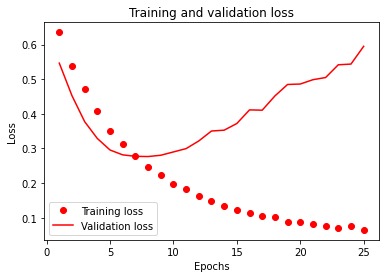

In [ ]:
import matplotlib.pyplot as plt

twolydrop_loss = history_9.history['loss']
twolydrop_val_loss = history_9.history['val_loss']

twolydrop_epochs = range(1, len(twolydrop_loss) + 1)

# "bo" is for "blue dot"
plt.plot(twolydrop_epochs, twolydrop_loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(twolydrop_epochs, twolydrop_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

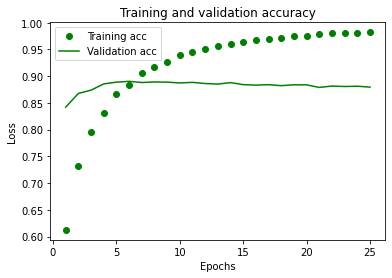

In [ ]:
plt.clf()   # clear figure
twolydrop_accuracy = history_9.history['accuracy']
twolydrop_val_accuracy = history_9.history['val_accuracy']

twolydrop_epochs = range(1, len(twolydrop_accuracy) + 1)

plt.plot(twolydrop_epochs, twolydrop_accuracy, 'go', label='Training acc')
plt.plot(twolydrop_epochs, twolydrop_val_accuracy, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**The results show that the best accuracy on the validation set appears around 8 epochs.**

###**_Back Propagation- Retraining the model using 8 epochs._**

In [ ]:
model_t9 = models.Sequential()
model_t9.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_t9.add(layers.Dropout(rate= 0.5))
model_t9.add(layers.Dense(16, activation='relu'))
model_t9.add(layers.Dropout(rate= 0.5))
model_t9.add(layers.Dense(1, activation='sigmoid'))

model_t9.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_t9.fit(x_train, y_train, epochs=8, batch_size=512)
results = model_t9.evaluate(x_test, y_test)

Epoch 1/8
49/49 [==============================] - 2s 32ms/step - loss: 0.6349 - accuracy: 0.6366
Epoch 2/8
49/49 [==============================] - 2s 32ms/step - loss: 0.5097 - accuracy: 0.7867
Epoch 3/8
49/49 [==============================] - 2s 30ms/step - loss: 0.4211 - accuracy: 0.8460
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.3563 - accuracy: 0.8780
Epoch 5/8
49/49 [==============================] - 1s 28ms/step - loss: 0.3058 - accuracy: 0.8960
Epoch 6/8
49/49 [==============================] - 1s 29ms/step - loss: 0.2744 - accuracy: 0.9090
Epoch 7/8
49/49 [==============================] - 2s 39ms/step - loss: 0.2435 - accuracy: 0.9183
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.3013 - accuracy: 0.8855


In [ ]:

results

[0.30133768916130066, 0.8854799866676331]

**_The accuracy of the model on the test set is 88.55%_** 

## **Model 10: 2 layers, 16 Neurons, Activation- relu, Optimizer- rmsprop, Loss- binary_crossentropy, Dropout- 0.3** 

In [ ]:
from keras.layers import Dropout


model_10 = models.Sequential()
model_10.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_10.add(layers.Dropout(rate= 0.3))
model_10.add(layers.Dense(16, activation='relu'))
model_10.add(layers.Dropout(rate=0.3))
model_10.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_10.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_10 = model_10.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 4s 72ms/step - loss: 0.5802 - accuracy: 0.7117 - val_loss: 0.4283 - val_accuracy: 0.8606
Epoch 2/25
30/30 [==============================] - 1s 42ms/step - loss: 0.4138 - accuracy: 0.8386 - val_loss: 0.3395 - val_accuracy: 0.8770
Epoch 3/25
30/30 [==============================] - 2s 57ms/step - loss: 0.3293 - accuracy: 0.8795 - val_loss: 0.3071 - val_accuracy: 0.8788
Epoch 4/25
30/30 [==============================] - 2s 71ms/step - loss: 0.2777 - accuracy: 0.9022 - val_loss: 0.2801 - val_accuracy: 0.8878
Epoch 5/25
30/30 [==============================] - 1s 48ms/step - loss: 0.2332 - accuracy: 0.9211 - val_loss: 0.2964 - val_accuracy: 0.8802
Epoch 6/25
30/30 [==============================] - 1s 39ms/step - loss: 0.2016 - accuracy: 0.9333 - val_loss: 0.2882 - val_accuracy: 0.8841
Epoch 7/25
30/30 [==============================] - 1s 37ms/step - loss: 0.1746 - accuracy: 0.9439 - val_loss: 0.2845 - val_accuracy: 0.8870
Epoch 8/25
30

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict_10 = history_10.history
history_dict_10.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

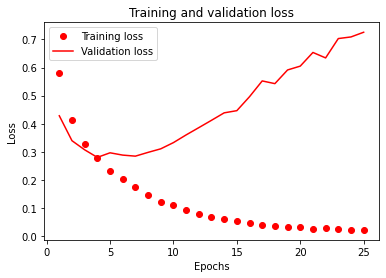

In [ ]:
import matplotlib.pyplot as plt

twolydrop2_loss = history_10.history['loss']
twolydrop2_val_loss = history_10.history['val_loss']

twolydrop2_epochs = range(1, len(twolydrop2_loss) + 1)

# "bo" is for "blue dot"
plt.plot(twolydrop2_epochs, twolydrop2_loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(twolydrop2_epochs, twolydrop2_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

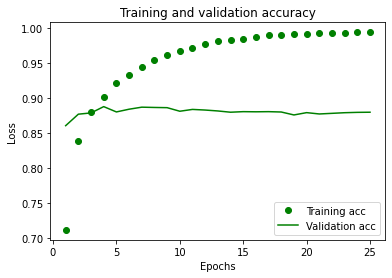

In [ ]:
plt.clf()   # clear figure
twolydrop2_accuracy = history_10.history['accuracy']
twolydrop2_val_accuracy = history_10.history['val_accuracy']

twolydrop2_epochs = range(1, len(twolydrop2_accuracy) + 1)

plt.plot(twolydrop2_epochs, twolydrop2_accuracy, 'go', label='Training acc')
plt.plot(twolydrop2_epochs, twolydrop2_val_accuracy, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



**The results show that the best accuracy on the validation set appears around 7 epochs.**

###**_Back Propagation- Retraining the model using 7 epochs._**

In [ ]:
model_t10= models.Sequential()
model_t10.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_t10.add(layers.Dropout(rate= 0.3))
model_t10.add(layers.Dense(16, activation='relu'))
model_t10.add(layers.Dropout(rate= 0.3))
model_t10.add(layers.Dense(1, activation='sigmoid'))

model_t10.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_t10.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_t10.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.5382 - accuracy: 0.7528
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.3540 - accuracy: 0.8687
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2733 - accuracy: 0.9033
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2778 - accuracy: 0.8877


**_The accuracy of the model on the test set is 88.77%_**

#**Summarizing the Accuracy and Loss of each model on the Test set** 

In [ ]:
import pandas as pd

data = {'Model': ['Model 1','Model 2',
                      'Model 3','Model 4',
                      'Model 5','Model 6',
                      'Model 7', 'Model 8',
                      'Model 9', 'Model 10'],
        'Loss Test': ['28.93%', '29.53%', '30.37%', '30.26%', '9.01%', '8.72%', '43.45%', '33.73%', '30.13%', '27.78%'],
        'Accuracy Test': ['88.48%', '88.38%', '88.42%', '87.98%', '87.70%', '88.26%', '87.58%', '88.44%', '88.55%', '88.77%'],
        'Number of Final Epochs': [4,4,5,5,2,4,2,3,8, 7]
        }

df = pd.DataFrame(data, columns = ['Model', 'Loss Test', 'Accuracy Test', 'Number of Final Epochs'])

df

,Model,Loss Test,Accuracy Test,Number of Final Epochs
0,Model 1,28.93%,88.48%,4
1,Model 2,29.53%,88.38%,4
2,Model 3,30.37%,88.42%,5
3,Model 4,30.26%,87.98%,5
4,Model 5,9.01%,87.70%,2
5,Model 6,8.72%,88.26%,4
6,Model 7,43.45%,87.58%,2
7,Model 8,33.73%,88.44%,3
8,Model 9,30.13%,88.55%,8
9,Model 10,27.78%,88.77%,7


##**Observation of Accuracy on the test set**

The accuracies of Model 9 and Model 10 is the highest among all the other models.



*   **Model 9** was built using 2 layers, 16 neurons, relu as the activation function, rmsprop as the optimizer, binary crossentropy as the loss function and dropout rate of 0.5
*  **Model 10** was built using 2 layers, 16 neurons, relu as the activation function, rmsprop as the optimizer, binary crossentropy as the loss function and dropout rate of 0.3





##**Observation of Loss value on the test set**

The loss value of Model 5 and Model 6 is the least from among all the other models.



* **Model 5** was built using 2 layers, 64 neurons, relu as the activation function, adam as the optimizer and mse as the loss function.
* **Model 6** was built using 2 layers, 16 neurons, tanh as the activation function, rmsprop as the optimizer and mse as the loss function.



#**_Model 9 and Model 10 results in the highest accuracy and Model 5 and Model 6 has the least loss value. Choosing the best model depends on either highest accuracy or least loss value._**

##Model 5 and Model 6 even though they have least loss value, but the loss function used to build these models was mse. Mse is usually used for continuous variables, but here we are dealing with categorical output. Mse loss function is usually used for regression tasks.

##Therfore, we will go with the model with highest accuracy, which will be **Model 10 with accuracy 88.77%**
